# Machine Learning Mastery Assignment
Name: Raul Catacora

email: rcatagrundy@gmail.com


## Task 1: Data Preparation (5 Marks)
* Load a dataset of your choice.
* Perform necessary data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features.

Choosen the breast_cancer dataset as it is a dataset that comply with the homework overall, can experiment with it in many cases and ways and there is no need to add any file to the homework.

In [3]:
# Loading the dataset from sklearn datasets

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

cancer_dataset.DESCR outputs a full description of the dataset, column names features and all information. Even summary statistics as a plus

In [9]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
len(cancer_dataset['feature_names'])

30

In [11]:
# Tranforming the object into a pandas dataframe to start training

data = pd.DataFrame(np.c_[cancer_dataset['data'], cancer_dataset['target']], columns = np.append(cancer_dataset['feature_names'], ['target']))
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [12]:
# Counting the available data for malignant and bening cells

malignant_count = len(data[data['target']==0])
bening_count = len(data[data['target']==1])
index =['malingnant', 'benign']
target = pd.Series(data=[malignant_count, bening_count], index=index)
target

malingnant    212
benign        357
dtype: int64

In [13]:
## Splitting the dataset while giving the features, Train data X and Result data y

X = data.iloc[:, 0:30]
y = data['target']

In [14]:
X # Just checking the resulting X df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
y # Checking the resulting y df

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

## Task 2: Supervised Learning (20 Marks)
* Part A: Choose one supervised learning algorithm (e.g., Decision Trees, Support Vector Machines, or Neural Networks) and train it on the dataset.
* Part B: Evaluate the performance of the trained model using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score).
* Part C: Compare the performance of at least two different supervised learning algorithms on the same dataset.


### Logistic Regression Model

In [16]:
## Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_train)

print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
print('Accuracy of Logistic regression classifier: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Precision on training data: {:.2f}'.format(precision_score(y_train, y_pred)))
print('Recall on training data: {:.2f}'.format(recall_score(y_train, y_pred)))
print('F1 score on training data: {:.2f}'.format(f1_score(y_train, y_pred)))


Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.94
Accuracy of Logistic regression classifier: 0.95
Precision on training data: 0.95
Recall on training data: 0.97
F1 score on training data: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### LinearSVC model

In [65]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = LinearSVC().fit(X_train, y_train)
y_pred = model.predict(X_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))
print('Accuracy of Linear SVC classifier: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Precision on training data: {:.2f}'.format(precision_score(y_train, y_pred)))
print('Recall on training data: {:.2f}'.format(recall_score(y_train, y_pred)))
print('F1 score on training data: {:.2f}'.format(f1_score(y_train, y_pred)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.91
Accuracy of Linear SVC classifier on test set: 0.93
Accuracy of Linear SVC classifier: 0.91
Precision on training data: 0.87
Recall on training data: 0.99
F1 score on training data: 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### SVC Model

In [66]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

model = SVC(C=10).fit(X_train, y_train)
y_pred = model.predict(X_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Accuracy of RBF-kernel SVC classifier: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Precision on training data: {:.2f}'.format(precision_score(y_train, y_pred)))
print('Recall on training data: {:.2f}'.format(recall_score(y_train, y_pred)))
print('F1 score on training data: {:.2f}'.format(f1_score(y_train, y_pred)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.95
Accuracy of RBF-kernel SVC on test set: 0.94
Accuracy of RBF-kernel SVC classifier: 0.92
Precision on training data: 0.90
Recall on training data: 0.98
F1 score on training data: 0.94


### MinMaxScaler Model

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(C=10).fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(model.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(model.score(X_test_scaled, y_test)))
print('Accuracy of RBF-Kernel SVC (with MinMax scaling) classifier: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Precision on training data: {:.2f}'.format(precision_score(y_train, y_pred)))
print('Recall on training data: {:.2f}'.format(recall_score(y_train, y_pred)))
print('F1 score on training data: {:.2f}'.format(f1_score(y_train, y_pred)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.99
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.97
Accuracy of RBF-Kernel SVC (with MinMax scaling) classifier: 0.99
Precision on training data: 0.98
Recall on training data: 1.00
F1 score on training data: 0.99


### Decision Tree Model

In [69]:
# import more libraries for auxiliar and graph code.
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

In [70]:
# Auxiliar function to plot decision tree
def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

In [96]:
# Auxliar function to plot feature importances
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

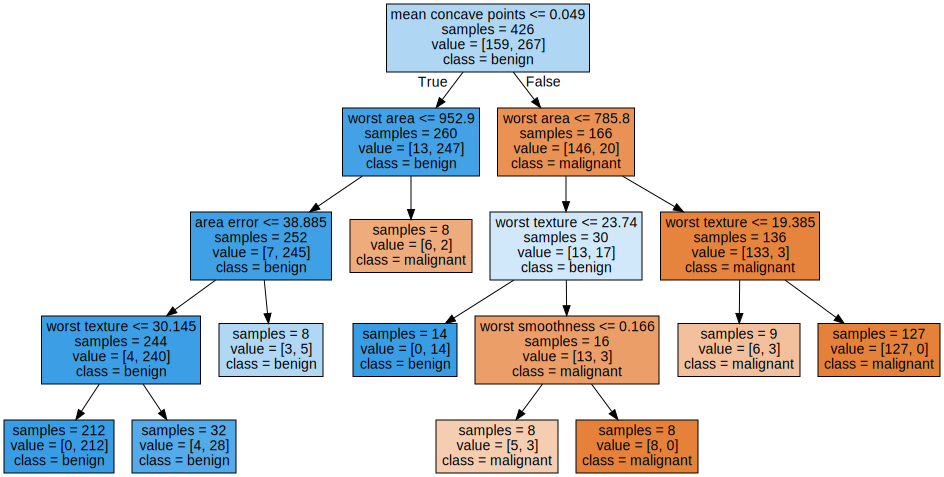

In [75]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)
y_pred = model.predict(X_train)

plot_decision_tree(model, cancer_dataset.feature_names, cancer_dataset.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94
Accuracy of Decision Tree classifier: 0.96
Precision on training data: 0.97
Recall on training data: 0.97
F1 score on training data: 0.97


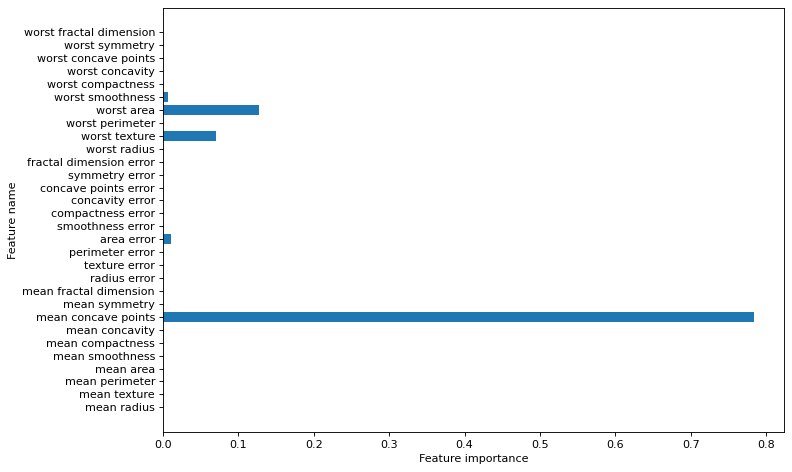

In [76]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))
print('Accuracy of Decision Tree classifier: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Precision on training data: {:.2f}'.format(precision_score(y_train, y_pred)))
print('Recall on training data: {:.2f}'.format(recall_score(y_train, y_pred)))
print('F1 score on training data: {:.2f}'.format(f1_score(y_train, y_pred)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(model, cancer_dataset.feature_names)
plt.tight_layout()

plt.show()

## Task 3: Unsupervised Learning (15 Marks)
* Part A: Apply an unsupervised learning algorithm (e.g., K-Means Clustering or Hierarchical Clustering) to identify patterns or clusters in the dataset.
* Part B: Visualize the clusters and interpret the results.
* Part C: Discuss the advantages and limitations of using unsupervised learning in this scenario.


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# There is already the X, y from the dataset loaded

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X.shape, X_pca.shape)

(569, 30) (569, 2)


In [79]:
# Auxiliar function to plot labelled scatter
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

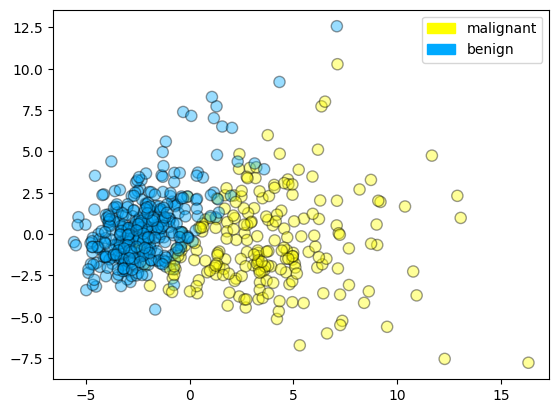

Text(0.5, 1.0, 'Breast Cancer Dataset PCA (n_components = 2)')

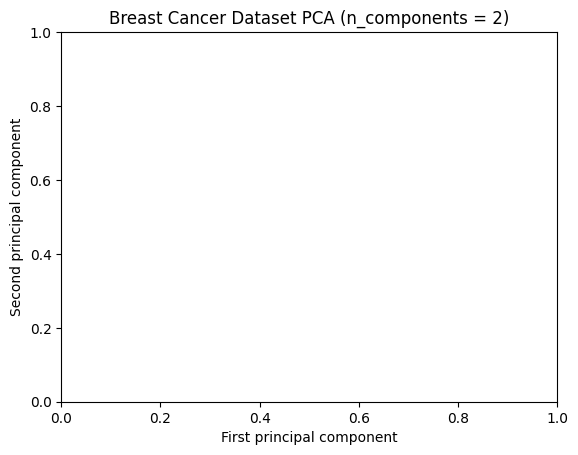

In [80]:
plot_labelled_scatter(X_pca, y, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)')

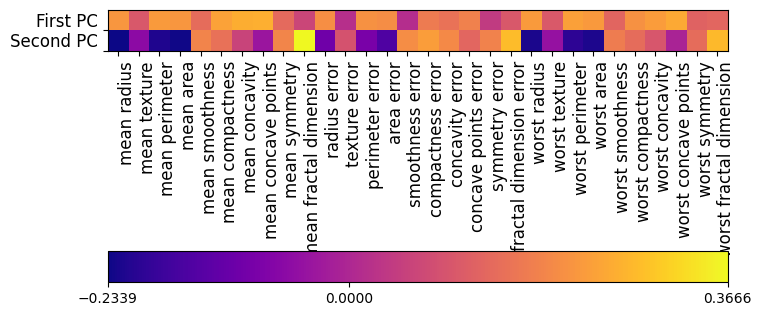

In [81]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer_dataset.feature_names)

plt.gca().set_xticks(np.arange(0, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()], pad=0.65);

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


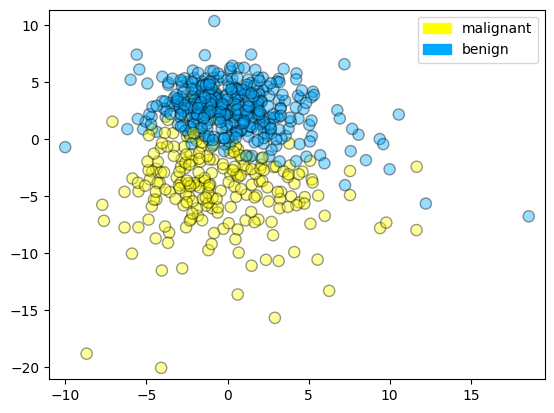

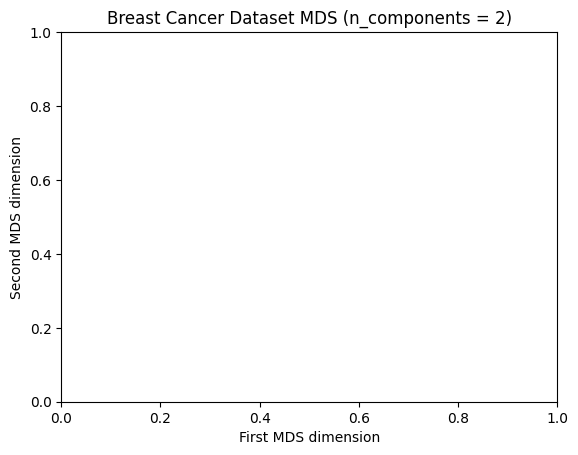

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

plot_labelled_scatter(X_mds, y, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

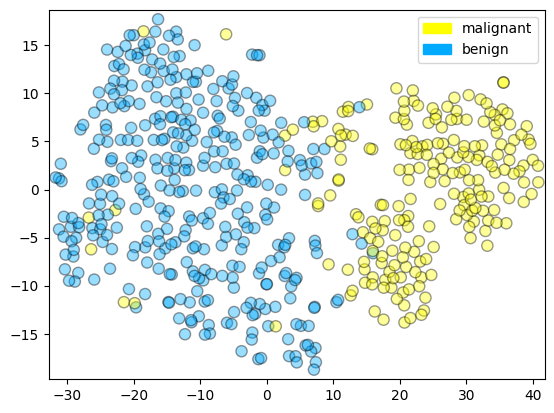

Text(0.5, 1.0, 'Breast cancer dataset t-SNE')

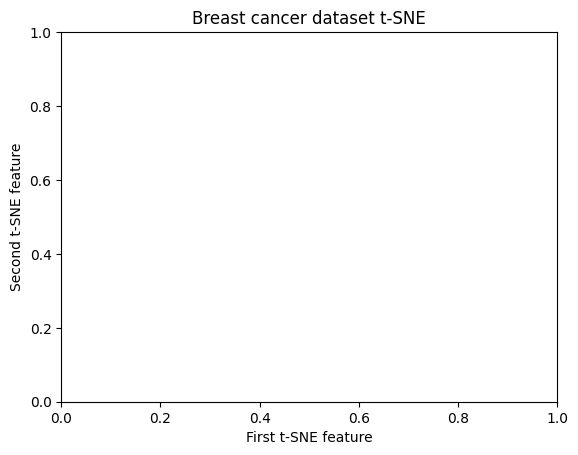

In [83]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y,
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE')

## Task 4: Application in Predictive Analytics (10 Marks)
* Choose one predictive analytics application (e.g., sales forecasting or customer churn prediction).
* Build a machine learning model to address the chosen application.
Evaluate the model's performance and discuss the practical implications.

I choose the sales forecasting while trying to predict Insurance Costs

It is necessary to load the insurance.csv file in order to run the following cells.

My github repository is the following:



In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Load in the insurance dataset
insurance = pd.read_csv("insurance.csv")

In [20]:
# Columns in the dataset
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

`charges` is the column that is going to be used as an outcome. The other columns will be potential predictors
Due to the fact that the `charges` column is skewed to the right. Then it is necessary to log-transform it.

In [21]:
insurance["log_charges"] = np.log2(insurance["charges"])


In [28]:
insurance.corr()

<ipython-input-28-6dfb2156544f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance.corr()


,age,bmi,children,charges,log_charges,is_smoker
age,1.000000,0.109272,0.042469,0.299008,0.527834,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.132669,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.161336,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.892964,0.787251
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000,0.665506
is_smoker,-0.025019,0.003750,0.007673,0.787251,0.665506,1.000000


From the correlation analysis, `age` has a 30% correlation with `charges` and `bmi` has 19.8% and the number of children has 6.7% correlation. This gives a clue on how to handle the features

In [22]:
# Splitting the data up into a training and test set
insurance["is_smoker"] = (insurance["smoker"] == "yes")
X = insurance[["age", "bmi", "is_smoker"]]
y = insurance["log_charges"]

# 75% for training set, 25% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 1)

In [23]:
# Training and checking model performance on training set
from sklearn.linear_model import LinearRegression
insurance_model = LinearRegression()
insurance_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Get predicted values by model
y_pred = insurance_model.predict(X_train)

# MSE on the log scale for the insurance charges
mean_squared_error(y_train, y_pred)

0.4546665339270644

In [25]:
# MSE on the original scale for the insurance charges
np.exp(mean_squared_error(y_train, y_pred))

1.575647870310887

In [26]:
# Coefficient of determination
r2_score(y_train, y_pred)

0.7421118855283421

The training MSE for the model is 0.454 and is 1.57 on the original scale. The
 indicates that the model can explain 74% of the variation in the log-insurance charges. These preliminary results are promising, but must remember that these are optimistic values.

## Bonus Task (Extra 5 Marks):
* Implement an additional machine learning algorithm of your choice and compare its performance with the existing models.


In [34]:
from sklearn import preprocessing
from sklearn import utils

from sklearn.svm import LinearSVC

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, random_state = 0)

model = LinearSVC().fit(X_train, y_train)
y_pred = model.predict(X_train)
print('Insurance Costs dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))
print('Accuracy of Linear SVC classifier: {:.2f}'.format(accuracy_score(y_train, y_pred)))


Insurance Costs dataset
Accuracy of Linear SVC classifier on training set: 0.01
Accuracy of Linear SVC classifier on test set: 0.00
Accuracy of Linear SVC classifier: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


It is necessary to adjust the training within the log transform and the SVC model to have proper values but as comparing only it won't help at all the second model is not giving anything back